In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
## matplotlib.rcparams['figure.figsize'] = (12,8) # Adjust the configuration of the plot we will create



In [4]:
# Read in the data 
df = pd.read_csv(r'C:\Users\lenovo\Desktop\SQL\movies.csv')

In [ ]:
#Let's look at the data
df.head()

In [ ]:
#Let's check if there is missing data - Note there are plenty ways to do this.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

In [ ]:
## Old style placeholder formating %s-string, %d-digit and %f-float
#then the value provided in a turple after another % operator
name = 'Alice'
age = 30
print('My name is %s and i am %d years old.' %(name, age))

In [ ]:
# str.format method- this method uses curly braces {} as placeholders
# within the string. Values are then passed as arguments to the format() method.

In [ ]:
item = 'Book'
price = 19.99
print('{} - {}'.format(item, price))
print('The {} cost: {}.'.format(item, price))

In [ ]:
# Data types for our column
df.dtypes

In [ ]:
# Change data type of columns

df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['votes'] = df['votes'].astype(int)

## error message check how to convert float to interger variable

In [ ]:
# the error message -cannot convert non-finite value(NA or inf) to integers 
#occurs in pandas or numpy when the column contain missing values or infinite value
# let's try to fix it

In [ ]:
df.isnull().sum() # checking the number of nulls in each column

In [ ]:
df.isnull().any()

In [ ]:
df['budget'].isna().sum() #Count NaNs


In [ ]:
np.isinf(df['budget']).sum() # Count inf/-inf which inturn there is non in the table

In [ ]:
df['gross'].isna().sum() #count Nans 


In [ ]:
df['votes'].isna().sum() #count Nans

In [ ]:
#it happen that there are missing values in the columns. lets handle them
# by either replacing them with 0, mean, median or another place holder.

In [ ]:
df['budget']=df['budget'].fillna(0)

In [ ]:
df['budget']=df['budget'].astype('int64') #Neatly we convert the column to integer after filling in the Nans with 0s

In [ ]:
median_value = np.mean(df['gross']) ## computing the median to replace with

In [ ]:
median_value = df['gross'].mean() # thesame function

In [ ]:
df['gross']=df['gross'].fillna(median_value)

In [ ]:
df['gross']=df['gross'].astype('int64')

In [ ]:
df.head()

In [ ]:
df['released'].astype(str).str[:4]
# error Check how to perform substring in python

In [ ]:
df.sort_values(by = ['gross'], inplace = False, ascending = False) #this sort the dataframe by gross

In [ ]:
pd.set_option('display.max_rows', None) #this display the full output

In [ ]:
# Drop any duplicates 

## df.drop_duplicates() this will drop any duplicates in the data 

df['company'].drop_duplicates().sort_values(ascending = False) # this will duplicates and sort values.

In [ ]:
df

In [ ]:
#Hypothetical Statement

# Budget high correlation
#Company high correlation

In [ ]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [ ]:
# plot budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

# The regression plot shows that there is a correlation 
#then i'm going to use corr() function to know the strength or level of the correlation

In [ ]:
#Plotting scatter plot gross vs votes

plt.scatter(x=df['gross'],y=df['votes'])
plt.title('gross vs votes')
plt.xlabel('gross')
plt.ylabel('votes')
plt.show()

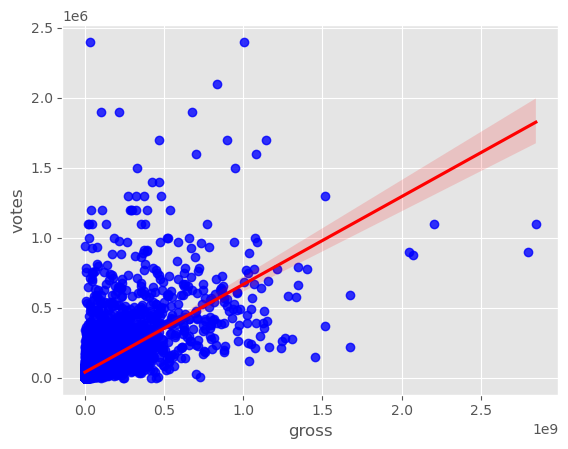

In [35]:
#plot gross vs votes using seaborns

sns.regplot(x='gross',y='votes', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.show()

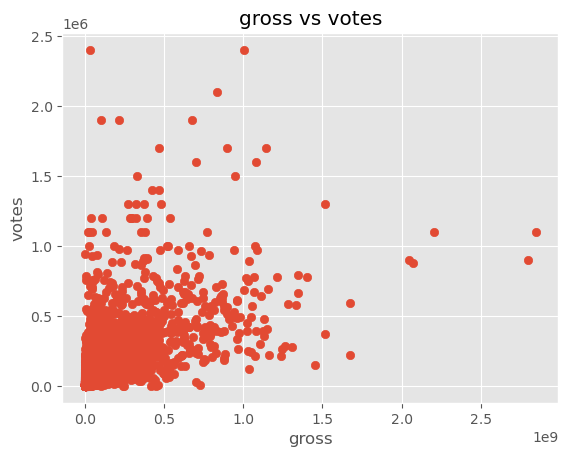

In [ ]:
# Let's start looking at correlation 

In [ ]:
 df.corr(method='spearman') # pearson, kendall, spearman

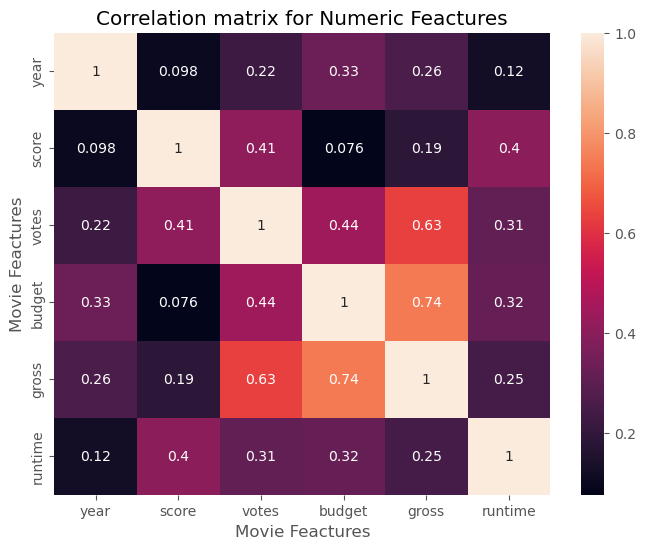

In [17]:
# select only numeric columns 
numeric_df = df.select_dtypes(include=['number'])

corr=numeric_df.corr()
plt.figure(num=None, figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix for Numeric Feactures')

plt.xlabel('Movie Feactures')

plt.ylabel('Movie Feactures')


plt.show()

In [18]:
#Choosen only 3 columns to perform correlation on 
df[['budget','gross','votes']].corr()

,budget,gross,votes
budget,1.000000,0.740395,0.442429
gross,0.740395,1.000000,0.630757
votes,0.442429,0.630757,1.000000


In [38]:
# Since correlation is only apply to numeric
#hence we are going to assign numeric value to the strings like company and others

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


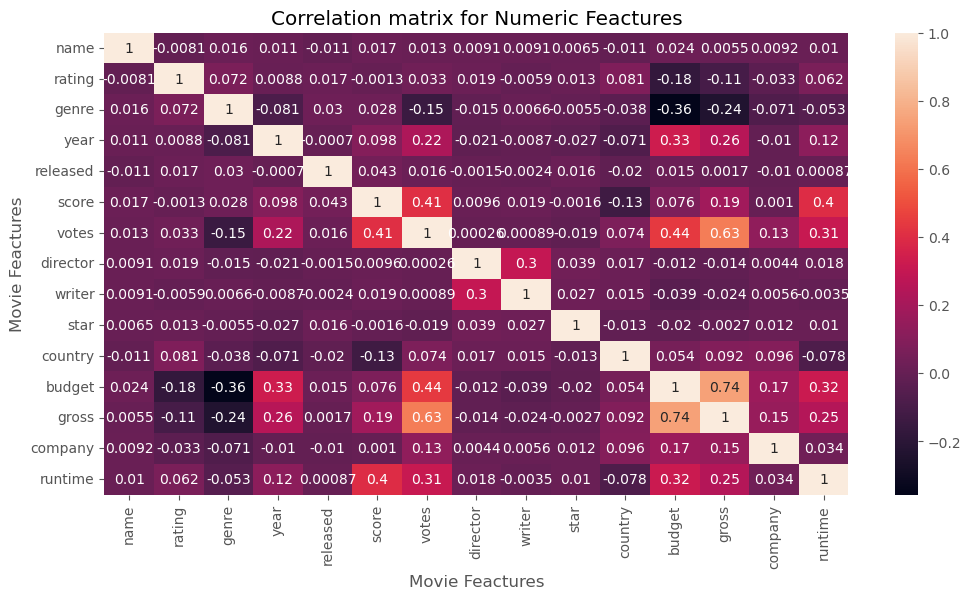

In [20]:
correlation_matrix = df_numerized.corr()

plt.figure(num=None, figsize=(12,6))
#plt.figure(num=None, figsize=(12,8))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Feactures')

plt.xlabel('Movie Feactures')

plt.ylabel('Movie Feactures')

plt.show()

In [29]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs
#df_numerized.corr().unstack()

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [27]:
sorted_values = corr_pairs.sort_values()
sorted_values

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [28]:
high_corr = sorted_values[(sorted_values) > 0.4]

high_corr

score     votes       0.409182
votes     score       0.409182
budget    votes       0.442429
votes     budget      0.442429
gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings
#company have low correlation 


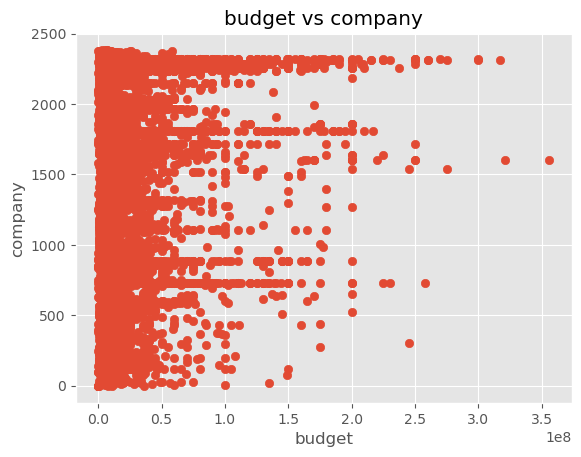

In [36]:

plt.scatter(x=df['budget'],y=df['company'])
plt.title('budget vs company')
plt.xlabel('budget')
plt.ylabel('company')
plt.show()

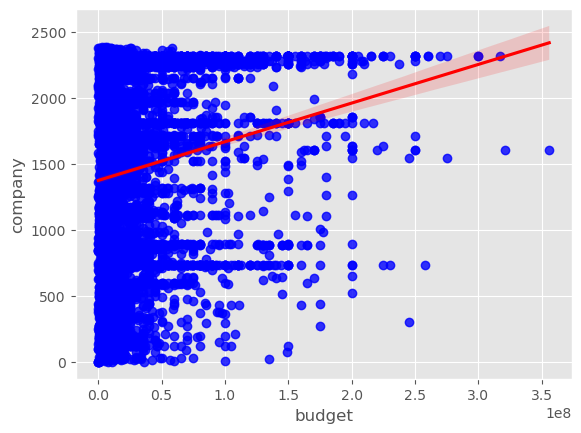

In [37]:
sns.regplot(x='budget',y='company', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.show()